# 理解特征

# Harris角点检测
- cv.cornerHarris()
- cv.cornerSubPix()
- cv.connectedComponentsWithStats()

In [69]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/chessboard.png')
# img = cv.imread('data/blox.jpg')            # 阈值:0.05
img = cv.resize(img, None, fx=0.2, fy=0.2)   # 缩小图像chessboard，便于显示

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
# img—float32类型的灰度图像        blockSize—角点检测中要考虑的领域大小
# ksize—Sobel求导中使用的窗口大小  k=0.04—自由参数，取值参数为[0,04，0.06]
# dst-返回角点强度的mask

dst = cv.dilate(dst, None)
img[dst > 0.05*dst.max()] = [0, 0, 255]      # 角点阈值0.01，它可能因图像而异

cv.namedWindow('dst', cv.WINDOW_NORMAL)
cv.imshow('dst', img)
cv.waitKey(0) 
cv.destroyAllWindows()

## 亚像素级精确度的角点

In [51]:
import numpy as np
import cv2 as cv
img = cv.imread('data/subpixel.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Harris角点检测
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, 0)
dst = np.uint8(dst)

# 寻找角点区域质心
ret, mark, stats, centroids = cv.connectedComponentsWithStats(dst)
# dst-输入二值图
# ret—连通域个数     mark-标记连通域的mask
# stats—统计信息列表 stats[0]=[0 0 338 303 99272]==>bbox (x,y,w,h) and contour_area
# centroids-连通域质心坐标列表

# 亚像素角点检测
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# 设置迭代终止条件: 迭代次数+迭代精度
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
# gray—输入float32灰度图
# winSize—搜索窗口的一半大小  zeroZone—死区大小的一半,(-1,-1)表示不设置
# corners—返回值由角点坐标组成的一个数组（而非图像）


# 绘制
res = np.hstack((centroids, corners))
res = np.int0(res)
img[res[:, 1], res[:, 0]] = [0, 0, 255]   # 红色:Harris角
img[res[:, 3], res[:, 2]] = [0, 255, 0]   # 绿色:亚像素角
# 坐标的索引方式:img[point[1], point[0]]

cv.imwrite('data/subpixel_1.png', img)
cv.namedWindow('dst', cv.WINDOW_NORMAL)
cv.imshow('dst', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Shi-tomas拐角检测器和益于跟踪的特征
cv.goodFeaturesToTrack()

float32


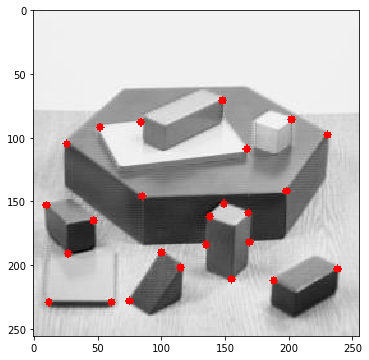

(<matplotlib.image.AxesImage at 0x1ef4474ad88>, None)

In [52]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/blox.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
# gray—单通道输入图
# maxCorners=25—输出的最大角点个数
# qualityLevel=0.01—角点强度阈值,取(0,1)
# minDistance=10—角点与其他角点的最小距离
# mask—可以带mask检测！！！
print(corners.dtype)         # 返回角点坐标: float32-numpy

corners = np.int0(corners)   # np.int0=>np.int64

plt.figure(figsize=(12, 6)) 
for i in corners:
    x,y = i.ravel()          # [[138 162]]->[138 162]
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

# SIFT尺度不变特征变换
- cv.xfeatures2d.SIFT_create()
- cv.drawKeypoints()

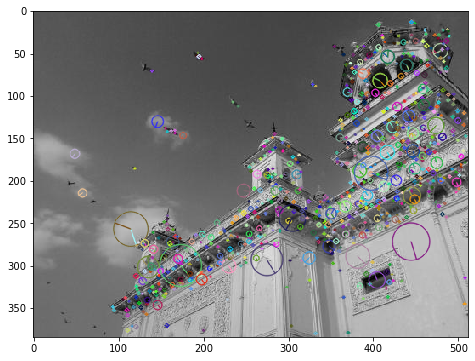

(<matplotlib.image.AxesImage at 0x1ef494a0e88>, None)

In [76]:
import numpy as np
import cv2 as cv

img = cv.imread('data/home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()

# kp = sift.detect(gray, None)                # 只检测关键点

kp, dp = sift.detectAndCompute(img, None)    # 检测关键点并计算描述符
# img—input  mask=None—mask

# img = cv.drawKeypoints(gray, kp, img)      # 只绘制关键点位置

img = cv.drawKeypoints(
    gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# gray—input kp—关键点  img—output=None flags—绘制关键点位置,大小和方向

def BGR2RGB(img):
    img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_RGB

plt.figure(figsize=(8, 6))
plt.imshow(BGR2RGB(img)), plt.show()

cv.imwrite('data/sift_keypoints.jpg', img)
cv.imshow('sift_keypoints', img)
cv.waitKey(0)
cv.destroyAllWindows()

# SURF简介（加速的强大功能）(略)

# 用于角点检测的FAST算法
cv.FastFeatureDetector_create()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 5083
Total Keypoints without nonmaxSuppression: 17733


(Text(0.5, 1.0, 'nonmax:False'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

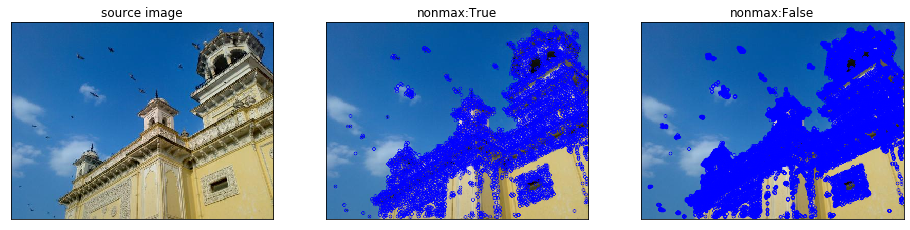

In [54]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')

fast = cv.FastFeatureDetector_create()    # 用默认值初始化FAST对象
kp = fast.detect(img, None)              # 寻找并绘制关键点
img1 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))

# 打印所有默认参数
print(("Threshold: {}".format(fast.getThreshold())))
print(("nonmaxSuppression:{}".format(fast.getNonmaxSuppression())))
print(("neighborhood: {}".format(fast.getType())))
print(("Total Keypoints with nonmaxSuppression: {}".format(len(kp))))
cv.imwrite('data/fast_true.png', img1)

# 关闭非极大抑制
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))

print(("Total Keypoints without nonmaxSuppression: {}".format(len(kp))))
cv.imwrite('data/fast_false.png', img2)


def BGR2RGB(img):
    img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_RGB


plt.figure(figsize=(16, 12))
plt.subplot(131), plt.imshow(BGR2RGB(img))
plt.title('source image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(BGR2RGB(img1))
plt.title('nonmax:True'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(BGR2RGB(img2))
plt.title('nonmax:False'), plt.xticks([]), plt.yticks([])

# BRIEF(二进制的鲁棒独立基本特征)
- cv.xfeatures2d.StarDetector_create()
- cv.xfeatures2d.BriefDescriptorExtractor_create()

In [55]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/home.jpg')

# 初始化CenSurE检测器(中心环绕检测器)
star = cv.xfeatures2d.StarDetector_create()   
kp = star.detect(img, None)         # 找到STAR的关键点

# 初始化BRIEF提取器
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
kp, des = brief.compute(img, kp)    # 计算BRIEF的描述符
# kp-关键点  des-描述符

print('num of keypoint: ', len(kp))  
print('dim of descriptor: ',brief.descriptorSize())  
print(des.shape)


num of keypoint:  225
dim of descriptor:  32
(225, 32)


# ORB (Oriented FAST and Rotated BRIEF)
cv.ORB_create()

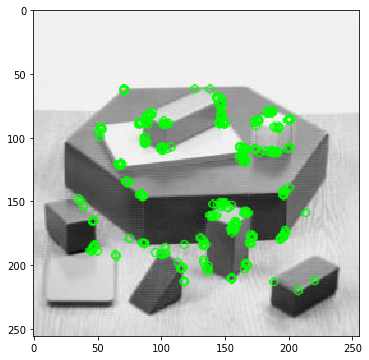

(<matplotlib.image.AxesImage at 0x1ef4405c408>, None)

In [56]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/blox.jpg')

orb = cv.ORB_create()            # 初始化ORB检测器
kp = orb.detect(img,None)       # 用ORB寻找关键点
kp, des = orb.compute(img, kp)  # 用ORB计算描述符
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)   # 仅绘制关键点的位置，而不绘制大小和方向

def BGR2RGB(img):
    img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_RGB

plt.figure(figsize=(8, 6))
plt.imshow(BGR2RGB(img2)), plt.show()

# 特征匹配
## 使用ORB描述符进行Brute-Force匹配
cv.BFMatcher()

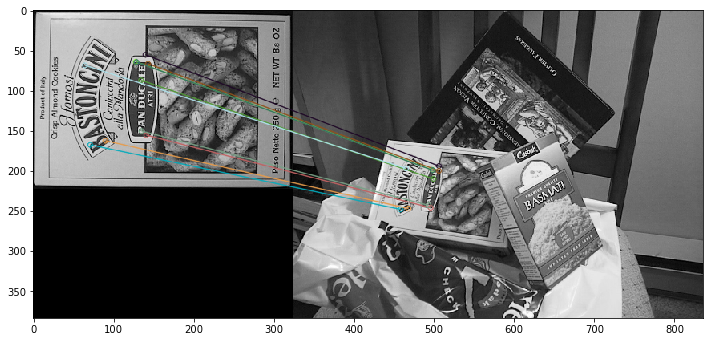

(<matplotlib.image.AxesImage at 0x1ef47ceb688>, None)

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('data/box.png', cv.IMREAD_GRAYSCALE)           # 目标图像
img2 = cv.imread('data/box_in_scene.png', cv.IMREAD_GRAYSCALE)  # 查询图像

# 初始化ORB检测器
orb = cv.ORB_create()
# 基于ORB找到关键点和检测器
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 创建BF匹配器的对象
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)  
# cv.NORM_L2->SIFT, Surf
# cv.NORM_HAMMING->ORB,BRIEF,BRISK
# crossCheck—是否需要相互匹配

matches = bf.match(des1, des2)                         # 返回值是一个DMatch对象列表               
matches = sorted(matches, key=lambda x: x.distance)   # 根据距离排序
img3 = cv.drawMatches(img1, kp1, img2, kp2,            # 绘制前10的匹配项
                      matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  # None—mask

plt.figure(figsize=(12, 12))
plt.imshow(img3), plt.show()

## 带有SIFT描述符和比值测试的Brute-Force匹配

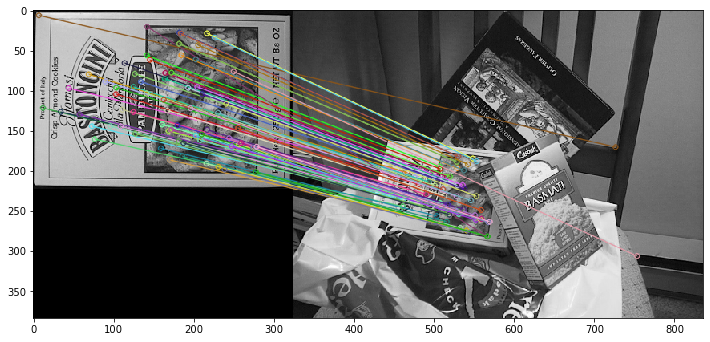

In [77]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('data/box.png', cv.IMREAD_GRAYSCALE)           # 目标图像
img2 = cv.imread('data/box_in_scene.png', cv.IMREAD_GRAYSCALE)  # 查询图像

# 初始化SIFT描述符
sift = cv.xfeatures2d.SIFT_create()
# 基于SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# 默认参数初始化BF匹配器
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)   # k=2，每个描述符最好的k个匹配

# 应用比值测试，找到最佳匹配
# 比值测试，首先获取与A 距离最近的点B（最近）和C（次近），只有当B/C小于阈值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离应该为0
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn将列表作为匹配项。
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good,
                         None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 12))
plt.imshow(img3), plt.show()

cv.imshow('dst', img3)
cv.waitKey(0)
cv.destroyAllWindows()

## FLANN匹配器
cv.FlannBasedMatcher() 快速最近邻搜索包

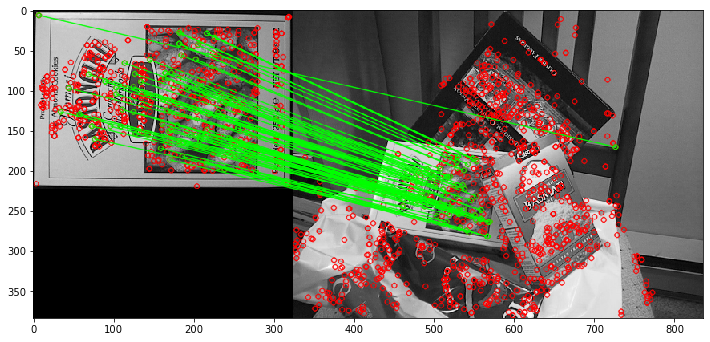

(<matplotlib.image.AxesImage at 0x1ef492bd4c8>, None)

In [72]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('data/box.png', cv.IMREAD_GRAYSCALE)           # 目标图像
img2 = cv.imread('data/box_in_scene.png', cv.IMREAD_GRAYSCALE)  # 查询图像

# 初始化SIFT描述符
sift = cv.xfeatures2d.SIFT_create()
# 基于SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN的index参数选择1:适用于SIFT/SURF
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

# FLANN的参数选择2:适用于ORB
# FLANN_INDEX_LSH = 6
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#                    table_number = 6,         # 12
#                    key_size = 12,            # 20
#                    multi_probe_level = 1)    # 2

# FLANN的search参数：指定索引中的树应递归遍历的次数，值越高，结果越准确，但是消耗的时间也越多
search_params = dict(checks=50)   # 或传递一个空字典{}

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# 只需要绘制好匹配项，因此创建一个掩码
matchesMask = [[0, 0] for i in range(len(matches))]

# 根据Lowe的论文进行比例测试,找到最佳匹配
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1, 0]
        
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,              # 只绘制[1,0]的kp，舍弃[0,0]的kp
                   flags=cv.DrawMatchesFlags_DEFAULT)    # dict(key=value,...)也可以定义字典
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)   # None—mask

plt.figure(figsize=(12, 12))
plt.imshow(img3), plt.show()

## 使用特征匹配和单应性查找对象
- cv2.findHomography()
- cv.perspectiveTransform()

在索引图像上查找对象图片，并把对象轮廓标记为白色

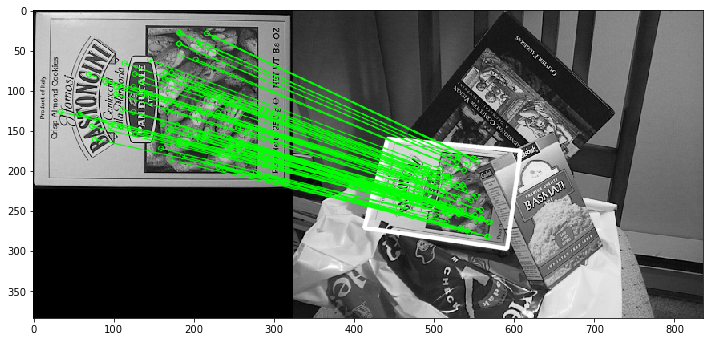

(<matplotlib.image.AxesImage at 0x1ef49c63fc8>, None)

In [84]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10                          # 匹配点的最小数量
img1 = cv.imread('data/box.png', 0)           # 目标图像
img2 = cv.imread('data/box_in_scene.png', 0)  # 查询图像

# 初始化SIFT检测器
sift = cv.xfeatures2d.SIFT_create()
# 用SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Flann匹配
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# 比值测试挑选最佳匹配
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

# 得到目标图像在查询图像上的匹配点，并绘制轮廓
if len(good) > MIN_MATCH_COUNT:
    # 获取目标图像和索引图像匹配的关键点的坐标
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)   # queryIdx—目标图像中描述符的索引
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)   # trainIdx—查询图像中描述符的索引
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    # cv.RANSAC/cv.CV_LMEDS—计算单应矩阵的方法
    # M—单应矩阵(透视矩阵)  mask—目标内部关键点的mask
    
    matchesMask = mask.ravel().tolist()
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]
                     ).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)
    # pts—图像1待匹配点  M—透视矩阵  dst—图像2匹配点
    img2 = cv.polylines(img2, [np.int32(dst)], True, 255, 3, cv.LINE_AA)
else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
    matchesMask = None

# 绘制内部匹配点
draw_params = dict(matchColor=(0, 255, 0),      # 用绿色绘制匹配
                   singlePointColor=None,       
                   matchesMask=matchesMask,     # 只绘制目标内部点
                   flags=2)
img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

plt.figure(figsize=(12, 12))
plt.imshow(img3, 'gray'), plt.show()